# Pelatihan Data Analitik

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
!pip install kmodes

In [123]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster
from sklearn import metrics

## Materi 1

In [28]:
url = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_1/sales.csv"
sales = pd.read_csv(url)

In [30]:
sales.head()

Year  Product       line Product.1  type  Product.2  Order method  \
0  2004  Camping  Equipment   Cooking  Gear  TrailChef  Water    Bag   
1  2004  Camping  Equipment   Cooking  Gear  TrailChef  Water    Bag   
2  2004  Camping  Equipment   Cooking  Gear  TrailChef  Water    Bag   
3  2004  Camping  Equipment   Cooking  Gear  TrailChef  Water    Bag   
4  2004  Camping  Equipment   Cooking  Gear  TrailChef  Water    Bag   

      type.1 Retailer country    Revenue  
0  Telephone   United  States  315044.33  
1  Telephone   Canada     NaN   14313.48  
2  Telephone   Mexico     NaN  156644.47  
3  Telephone   Brazil     NaN   59191.72  
4  Telephone    Japan     NaN    7029.33

In [15]:
sales.dtypes

Year           int64
Product       object
line          object
Product.1     object
type          object
Product.2     object
Order         object
method        object
type.1        object
Retailer      object
country       object
Revenue      float64
dtype: object

In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       100 non-null    int64  
 1   Product    100 non-null    object 
 2   line       100 non-null    object 
 3   Product.1  100 non-null    object 
 4   type       100 non-null    object 
 5   Product.2  100 non-null    object 
 6   Order      100 non-null    object 
 7   method     100 non-null    object 
 8   type.1     100 non-null    object 
 9   Retailer   100 non-null    object 
 10  country    9 non-null      object 
 11  Revenue    100 non-null    float64
dtypes: float64(1), int64(1), object(10)
memory usage: 9.5+ KB


In [17]:
sales['Product line'] = sales['Product']+' '+sales['line']
sales = sales.drop(['Product', 'line'], axis = 1)
sales.head()

Year Product.1  type  Product.2  Order method     type.1 Retailer country  \
0  2004   Cooking  Gear  TrailChef  Water    Bag  Telephone   United  States   
1  2004   Cooking  Gear  TrailChef  Water    Bag  Telephone   Canada     NaN   
2  2004   Cooking  Gear  TrailChef  Water    Bag  Telephone   Mexico     NaN   
3  2004   Cooking  Gear  TrailChef  Water    Bag  Telephone   Brazil     NaN   
4  2004   Cooking  Gear  TrailChef  Water    Bag  Telephone    Japan     NaN   

     Revenue       Product line  
0  315044.33  Camping Equipment  
1   14313.48  Camping Equipment  
2  156644.47  Camping Equipment  
3   59191.72  Camping Equipment  
4    7029.33  Camping Equipment

In [18]:
sales.groupby(['Product.1','type'])['Year'].count()

Product.1  type
Cooking    Gear    100
Name: Year, dtype: int64

In [19]:
sales['Product type'] = sales['Product.1']+' '+sales['type']
sales = sales.drop(['Product.1', 'type'], axis = 1)
sales.head()

Year  Product.2  Order method     type.1 Retailer country    Revenue  \
0  2004  TrailChef  Water    Bag  Telephone   United  States  315044.33   
1  2004  TrailChef  Water    Bag  Telephone   Canada     NaN   14313.48   
2  2004  TrailChef  Water    Bag  Telephone   Mexico     NaN  156644.47   
3  2004  TrailChef  Water    Bag  Telephone   Brazil     NaN   59191.72   
4  2004  TrailChef  Water    Bag  Telephone    Japan     NaN    7029.33   

        Product line  Product type  
0  Camping Equipment  Cooking Gear  
1  Camping Equipment  Cooking Gear  
2  Camping Equipment  Cooking Gear  
3  Camping Equipment  Cooking Gear  
4  Camping Equipment  Cooking Gear

In [20]:
sales['Product']=sales['Product.2']+' '+sales['Order']\
                 +' '+sales['method']
sales = sales.drop(['Product.2', 'Order','method'], axis = 1)
sales.head()

Year     type.1 Retailer country    Revenue       Product line  \
0  2004  Telephone   United  States  315044.33  Camping Equipment   
1  2004  Telephone   Canada     NaN   14313.48  Camping Equipment   
2  2004  Telephone   Mexico     NaN  156644.47  Camping Equipment   
3  2004  Telephone   Brazil     NaN   59191.72  Camping Equipment   
4  2004  Telephone    Japan     NaN    7029.33  Camping Equipment   

   Product type              Product  
0  Cooking Gear  TrailChef Water Bag  
1  Cooking Gear  TrailChef Water Bag  
2  Cooking Gear  TrailChef Water Bag  
3  Cooking Gear  TrailChef Water Bag  
4  Cooking Gear  TrailChef Water Bag

In [21]:
sales.groupby('type.1')['Year'].count()

type.1
Mail         16
Special      21
Telephone    21
Web          21
visit        21
Name: Year, dtype: int64

In [22]:
sales=sales.rename(columns = {'type.1':'Order method'})

In [23]:
sales.head()

Year Order method Retailer country    Revenue       Product line  \
0  2004    Telephone   United  States  315044.33  Camping Equipment   
1  2004    Telephone   Canada     NaN   14313.48  Camping Equipment   
2  2004    Telephone   Mexico     NaN  156644.47  Camping Equipment   
3  2004    Telephone   Brazil     NaN   59191.72  Camping Equipment   
4  2004    Telephone    Japan     NaN    7029.33  Camping Equipment   

   Product type              Product  
0  Cooking Gear  TrailChef Water Bag  
1  Cooking Gear  TrailChef Water Bag  
2  Cooking Gear  TrailChef Water Bag  
3  Cooking Gear  TrailChef Water Bag  
4  Cooking Gear  TrailChef Water Bag

In [24]:
sales=sales.fillna('')

In [25]:
sales['Retailer country']=sales['Retailer']+' '+sales['country']
sales = sales.drop(['Retailer', 'country'], axis = 1)
sales.head()

Year Order method    Revenue       Product line  Product type  \
0  2004    Telephone  315044.33  Camping Equipment  Cooking Gear   
1  2004    Telephone   14313.48  Camping Equipment  Cooking Gear   
2  2004    Telephone  156644.47  Camping Equipment  Cooking Gear   
3  2004    Telephone   59191.72  Camping Equipment  Cooking Gear   
4  2004    Telephone    7029.33  Camping Equipment  Cooking Gear   

               Product Retailer country  
0  TrailChef Water Bag    United States  
1  TrailChef Water Bag          Canada   
2  TrailChef Water Bag          Mexico   
3  TrailChef Water Bag          Brazil   
4  TrailChef Water Bag           Japan

## Materi 2

In [33]:
url2 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_2/Advertising.csv"
ads = pd.read_csv(url2, index_col = 'Date')
ads.head()

Products     Web  Newspaper  Radio     TV
Date                                                
01/01/2018   Mobile  230100      69200  37800  22100
01/02/2018   Mobile   44500      45100  39300  10400
01/03/2018   Mobile   17200      69300  45900   9300
01/04/2018   Mobile  151500      58500  41300  18500
01/05/2018   Mobile  180800      58400  10800  12900

In [34]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 01/01/2018 to 07/06/2019
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Products   200 non-null    object
 1   Web        200 non-null    int64 
 2   Newspaper  200 non-null    int64 
 3   Radio      200 non-null    int64 
 4   TV         200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [35]:
ads.describe()

Web      Newspaper         Radio            TV
count     200.000000     200.000000    200.000000    200.000000
mean   147042.500000   30554.000000  23264.000000  14022.500000
std     85854.236315   21778.620839  14846.809176   5217.456566
min       700.000000     300.000000      0.000000   1600.000000
25%     74375.000000   12750.000000   9975.000000  10375.000000
50%    149750.000000   25750.000000  22900.000000  12900.000000
75%    218825.000000   45100.000000  36525.000000  17400.000000
max    296400.000000  114000.000000  49600.000000  27000.000000

In [36]:
ads['Products'].unique()

array(['Mobile', 'Electronics', 'Laptops'], dtype=object)

In [37]:
ads['Products'].value_counts()

Mobile         129
Electronics     53
Laptops         18
Name: Products, dtype: int64

In [38]:
ads.groupby('Products')[['Web','Newspaper','Radio','TV']]\
   .sum()

Web  Newspaper    Radio       TV
Products                                          
Electronics   7734400    1500100  1161200   698300
Laptops       2711700     379200   374000   257800
Mobile       18962400    4231500  3117600  1848400

<Axes: xlabel='Products'>

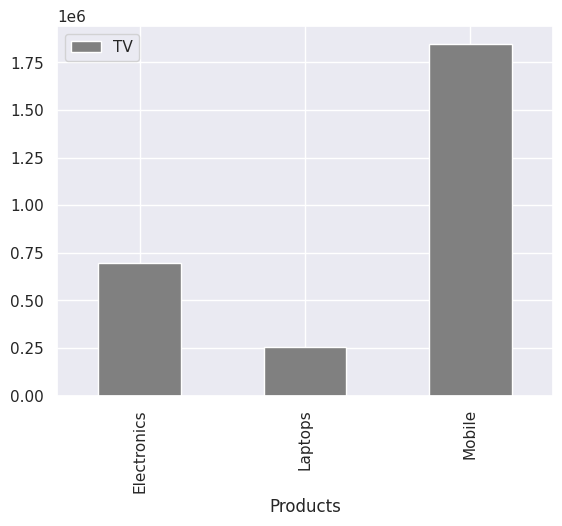

In [39]:
sns.set()
ads.groupby('Products').sum().plot(kind = 'bar', \
                                   y = 'TV',color='gray')

In [40]:
ads.groupby('Products').sum().plot(kind = 'bar', \
                                   y = 'Web',color='gray')

<Axes: xlabel='Products'>

In [41]:
sns.pairplot(ads, hue='Products', palette='gray')

## Materi 3

### Bank Customer Segmentation for Loan Campaign

In [44]:
url3 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_3/Bank_Personal_Loan_Modelling-1.csv"
bank0 = pd.read_csv(url3)
bank0.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [45]:
bank0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [46]:
scaler = StandardScaler()

bank0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform\
                                           (bank0[['Income', \
                                                   'CCAvg']])

bank0[['Income_scaled', 'CCAvg_scaled']].describe()

Income_scaled  CCAvg_scaled
count   5.000000e+03  5.000000e+03
mean    1.449507e-16 -6.394885e-17
std     1.000100e+00  1.000100e+00
min    -1.428969e+00 -1.108987e+00
25%    -7.554825e-01 -7.084116e-01
50%    -2.123482e-01 -2.506106e-01
75%     5.263146e-01  3.216407e-01
max     3.263712e+00  4.613525e+00

In [47]:
model = KMeans(n_clusters=3, random_state=42)

cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank0[cluster_cols])

bank0['Cluster'] = model.predict(bank0[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


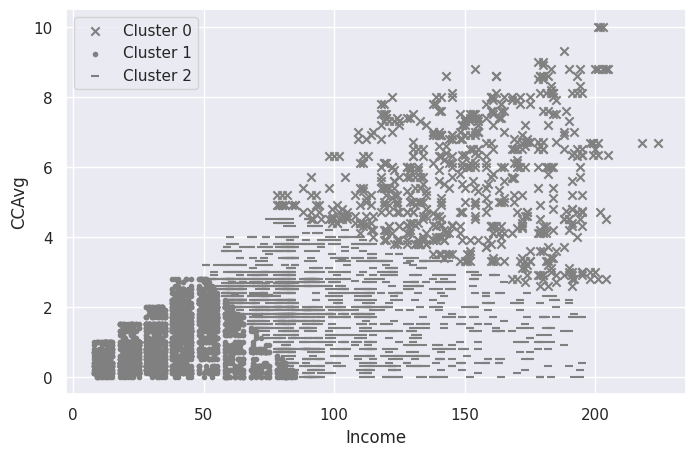

In [48]:
markers = ['x', '.', '_']

plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, \
                marker=markers[clust], \
                color='gray',\
                label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

In [49]:
bank0.groupby('Cluster')[['Income', 'CCAvg']].mean()

Income     CCAvg
Cluster                      
0        150.390282  5.540345
1         39.135072  0.982417
2         96.142777  2.025165

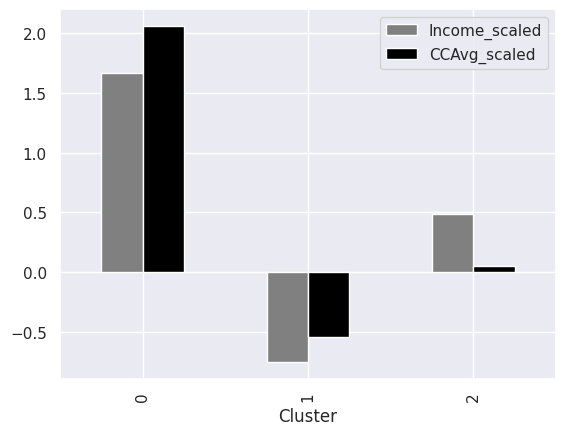

In [50]:
bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']]\
                        .mean().plot\
                        .bar(color=['gray','black'])
plt.show()

In [51]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
            'CreditCard', 'Online', 'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean()

Income     CCAvg        Age   Mortgage    Family  CreditCard  \
Cluster                                                                     
0        150.390282  5.540345  43.924765  89.537618  2.017241    0.285266   
1         39.135072  0.982417  45.797197  42.231218  2.513429    0.294667   
2         96.142777  2.025165  45.184049  65.185165  2.363636    0.296152   

           Online  Personal Loan  
Cluster                           
0        0.605016       0.413793  
1        0.592448       0.000000  
2        0.600112       0.120468

### Bank Customer Segmentation with Multiple Features

In [52]:
bank_scaled = bank0.copy()

cluster_cols = ['Income', 'CCAvg', 'Age', 'Experience', \
                'Mortgage']

bank_scaled[cluster_cols] = scaler.fit_transform\
                            (bank_scaled[cluster_cols])

In [53]:
bank_scaled[cluster_cols].describe()

Income         CCAvg           Age    Experience      Mortgage
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03
mean   1.449507e-16 -6.394885e-17 -2.131628e-18 -1.179501e-16 -5.613288e-17
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00
min   -1.428969e+00 -1.108987e+00 -1.948906e+00 -2.014911e+00 -5.555239e-01
25%   -7.554825e-01 -7.084116e-01 -9.019702e-01 -8.812043e-01 -5.555239e-01
50%   -2.123482e-01 -2.506106e-01 -2.952359e-02 -9.121982e-03 -5.555239e-01
75%    5.263146e-01  3.216407e-01  8.429230e-01  8.629604e-01  4.375576e-01
max    3.263712e+00  4.613525e+00  1.889859e+00  1.996667e+00  5.688108e+00

In [54]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(bank_scaled[cluster_cols])

bank_scaled['Cluster'] = model.predict(bank_scaled[cluster_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(bank_scaled[cluster_cols])

bank_scaled['pc1'] = pca_res[:,0]
bank_scaled['pc2'] = pca_res[:,1]

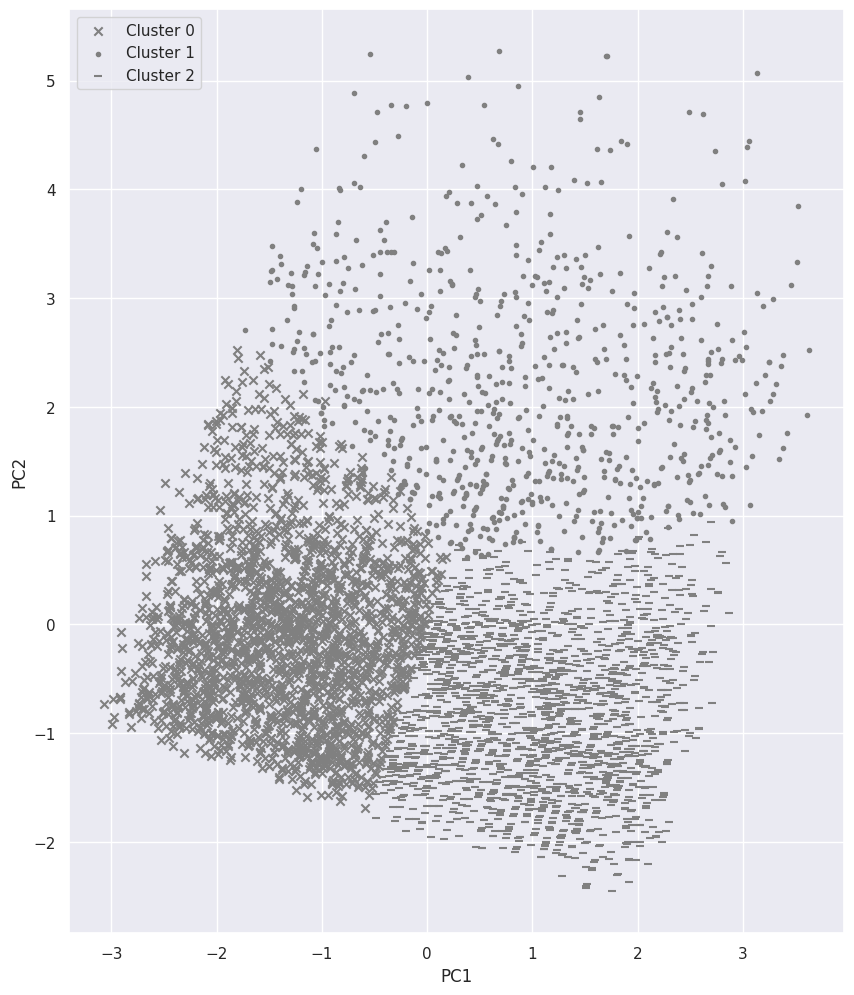

In [56]:
markers = ['x', '.', '_']
plt.figure(figsize=[10,12])

for clust in range(3):
    temp = bank_scaled[bank_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [57]:
bank0['Cluster'] = bank_scaled.Cluster
bank0.groupby('Cluster')[cluster_cols].mean()

Income     CCAvg        Age  Experience    Mortgage
Cluster                                                         
0         58.941774  1.367514  55.536044   30.233826   45.134935
1        147.650185  4.856403  43.672435   18.644005  116.279357
2         60.124322  1.382121  35.116428    9.873705   44.771584

In [58]:
sel_cols = ['Income', 'CCAvg', 'Age', 'Experience', 'Mortgage', \
            'Family', 'CreditCard', 'Online', 'Personal Loan']

bank0.groupby('Cluster')[sel_cols].mean()

Income     CCAvg        Age  Experience    Mortgage    Family  \
Cluster                                                                      
0         58.941774  1.367514  55.536044   30.233826   45.134935  2.397874   
1        147.650185  4.856403  43.672435   18.644005  116.279357  2.002472   
2         60.124322  1.382121  35.116428    9.873705   44.771584  2.552047   

         CreditCard    Online  Personal Loan  
Cluster                                       
0          0.300370  0.604898       0.039741  
1          0.299135  0.613103       0.398022  
2          0.285150  0.581648       0.035520

## Materi 4

### Optimizing a Luxury Clothing Brand's Marketing Campaign using Clustering

In [61]:
url41 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_4/Clothing_Customers.csv"
data0 = pd.read_csv(url41)
data0.head()

income  age  days_since_purchase  annual_spend
0   37453   48                  504          4441
1   50775   50                  566          4239
2   71047   41                  326          5834
3   52239   52                  259          5456
4  112343   27                  279          1749

In [62]:
cluster_cols = data0.columns
data_scaled = data0.copy()

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[cluster_cols] = scaler.fit_transform\
                            (data0[cluster_cols])

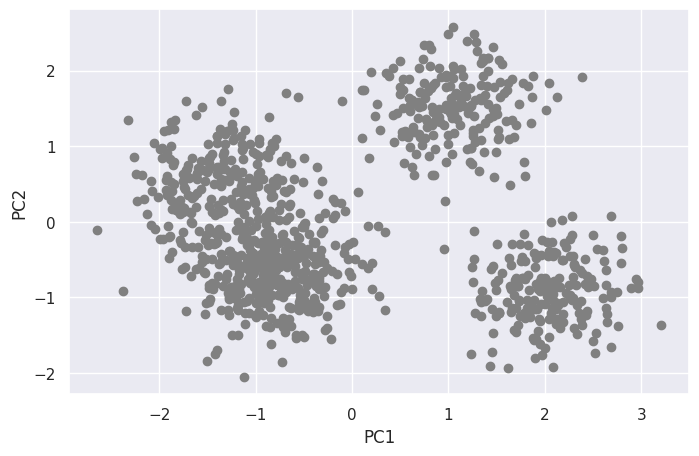

In [64]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,5])
plt.scatter(data_scaled.pc1, data_scaled.pc2, color='gray')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

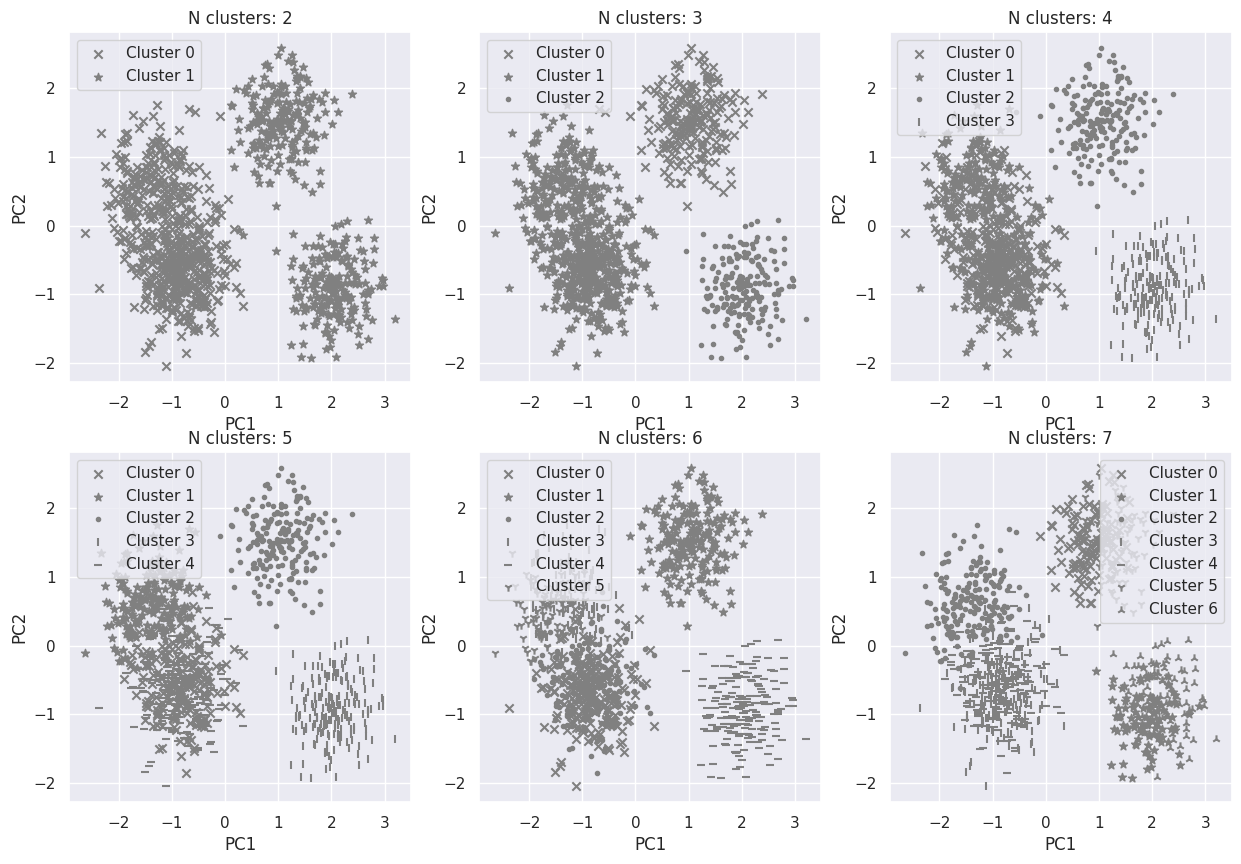

In [65]:
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_scaled['Cluster']= model.fit_predict\
                            (data_scaled[cluster_cols])

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = data_scaled[data_scaled.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, \
                    marker=markers[clust], \
                    label="Cluster "+str(clust), \
                    color='gray')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.title("N clusters: "+str(n))

plt.show()

In [66]:
inertia_scores = []

for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42)\
              .fit(data_scaled).inertia_
    inertia_scores.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

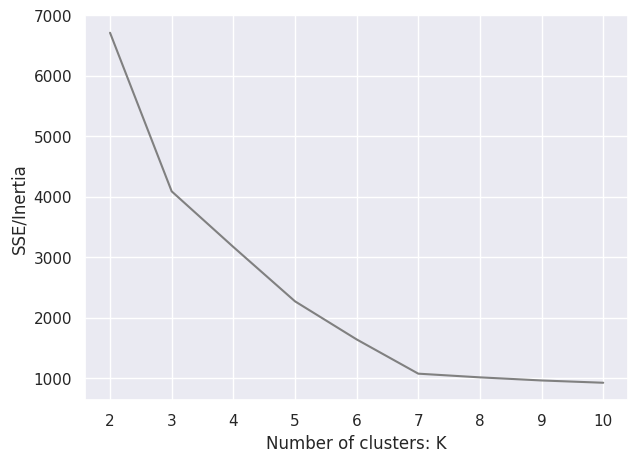

In [67]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

### Evaluating Clustering on Customer Data

In [72]:
url42 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_4/customer_offers.csv"
df = pd.read_csv(url42)

In [73]:
df.head()

1  2  3  4  5  6  7  8  9  10  ...  23  24  25  26  27  28  29  30  31  32
0  0  0  0  0  0  0  0  0  0   0  ...   0   0   0   0   0   0   1   1   0   0
1  0  0  0  0  0  0  0  0  1   0  ...   0   0   0   0   1   0   0   0   0   0
2  0  0  0  0  0  0  0  0  0   0  ...   0   1   0   1   0   0   0   0   0   0
3  0  0  0  0  0  0  1  0  0   0  ...   0   0   0   0   0   0   0   1   0   0
4  0  0  0  0  0  0  1  0  0   1  ...   0   0   0   0   0   0   0   0   1   0

[5 rows x 32 columns]

In [74]:
from sklearn import model_selection

X_train, X_test = model_selection.train_test_split\
                  (df, random_state = 100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

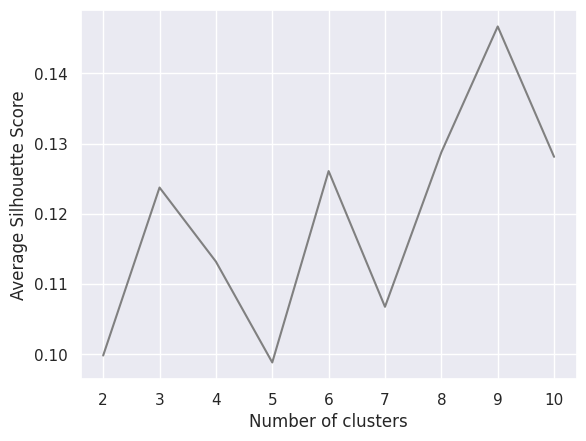

In [75]:
krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train)

    silhouette_avg = metrics.silhouette_score(X_train, \
                                              cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [76]:
model = cluster.KMeans(n_clusters=4, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.05430581044422598


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [77]:
bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1)

ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


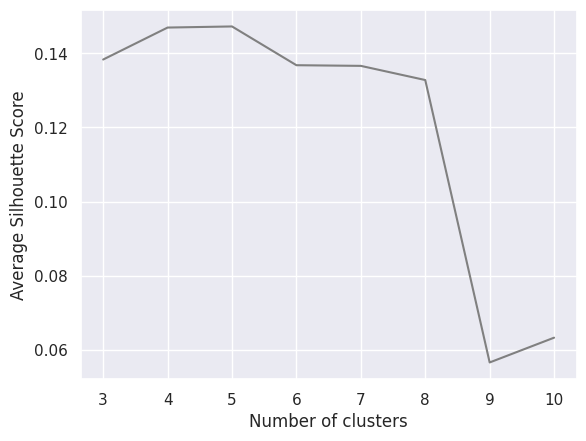

In [80]:
from kmodes.kmodes import KModes

krange = list(range(3,11))
avg_silhouettes = []

for n in krange:

    km = KModes(n_clusters=n, random_state=100)
    km.fit(X_train)

    kmode_labels = km.predict(X_train)
    kmode_silhouette = metrics.silhouette_score\
                       (X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [81]:
km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)

kmode_labels = km.predict(X_test)
kmode_silhouette = metrics.silhouette_score\
                   (X_test, kmode_labels)

print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501


## Materi 5

### Storefront location associations

In [83]:
url5 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_5/location_rev.csv"
df = pd.read_csv(url5)
df.head()

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80              3.0       30527.57               1407.0   
1  38628.37              3.0       30185.49               1025.0   
2  39715.16              1.0       32182.24               1498.0   
3  35593.30              5.0       29728.65               2340.0   
4  35128.18              4.0       30691.17                847.0   

   population_density  location_age  
0              3302.0          12.0  
1              4422.0          11.0  
2              3260.0          12.0  
3              4325.0          10.0  
4              3774.0          11.0

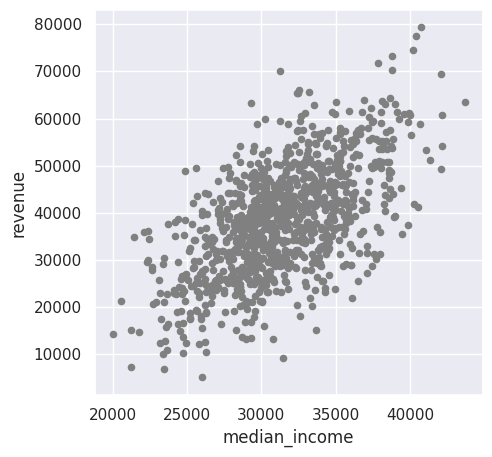

In [84]:
df.plot.scatter("median_income", 'revenue', \
                figsize=[5,5], color='gray')
plt.show()

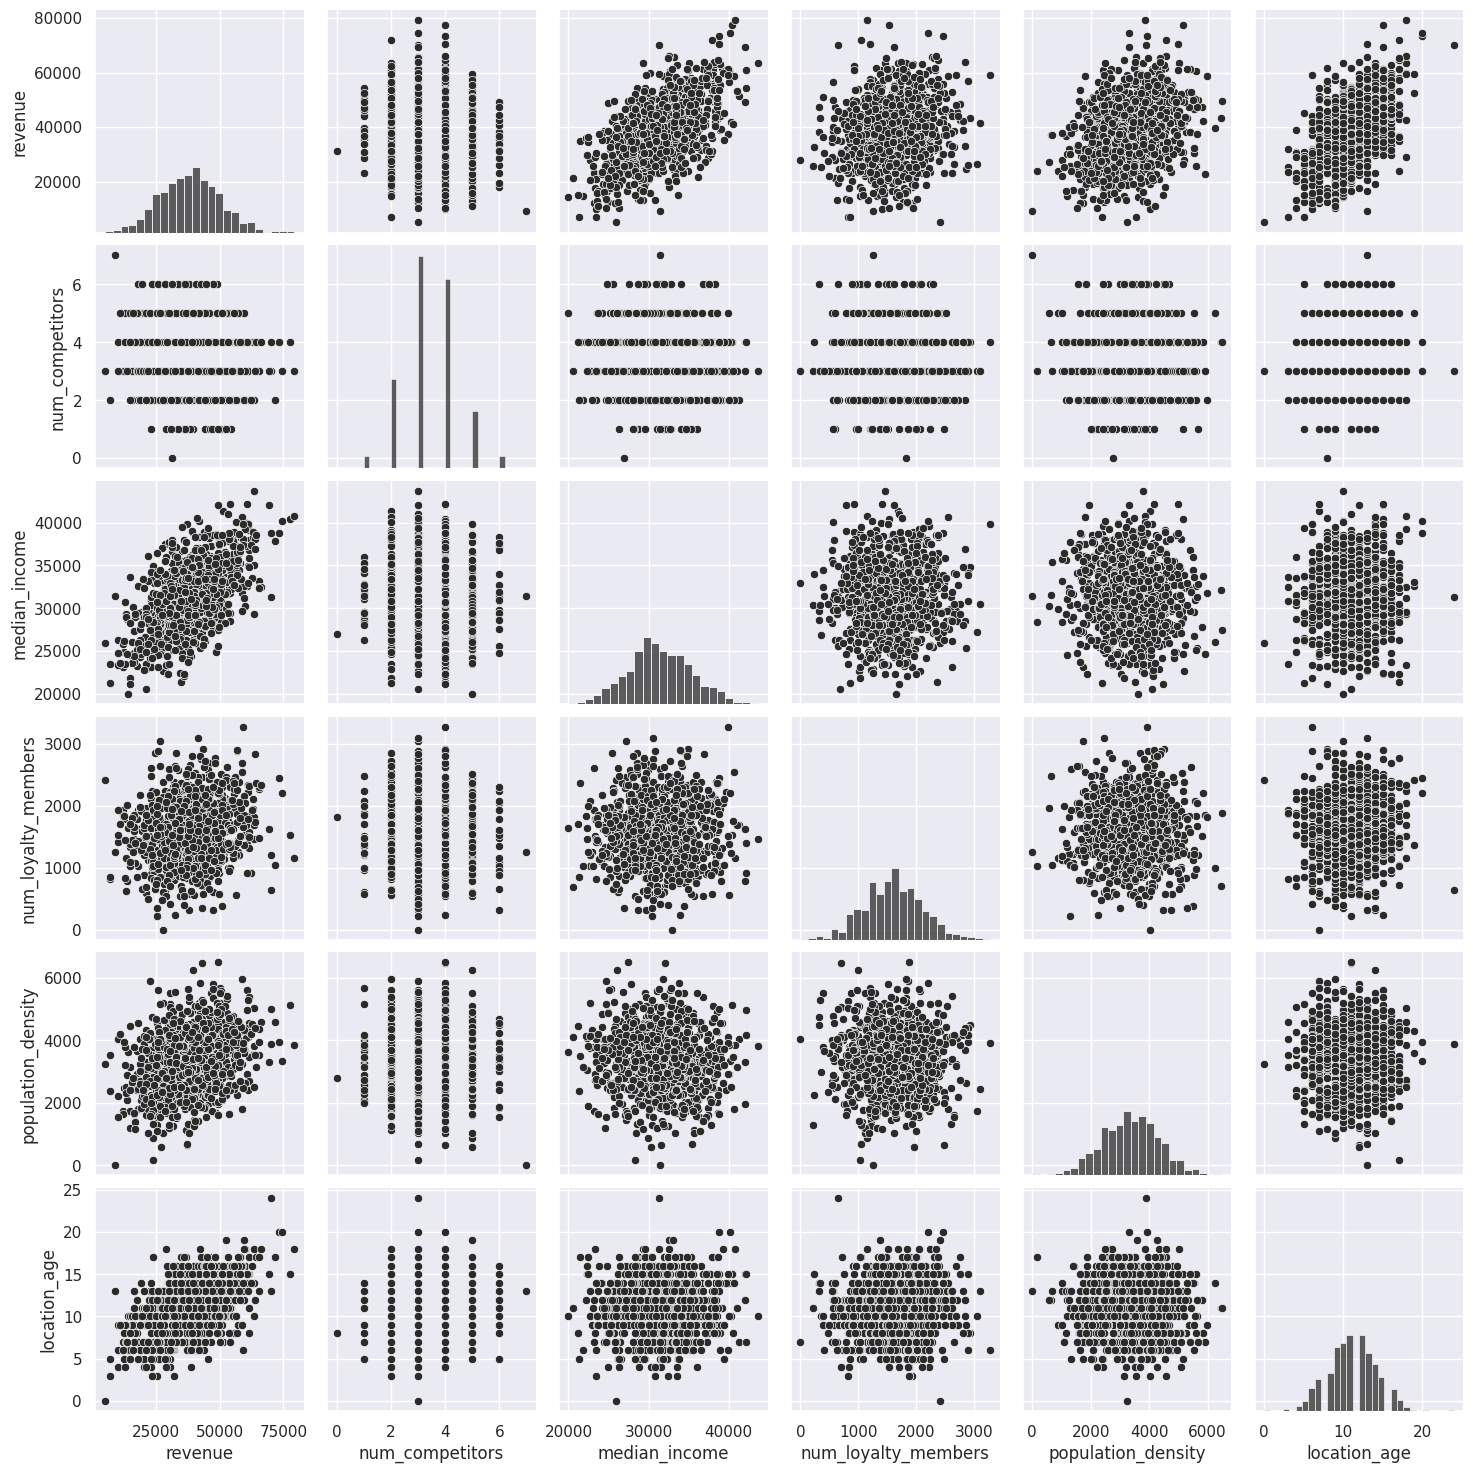

In [85]:
sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

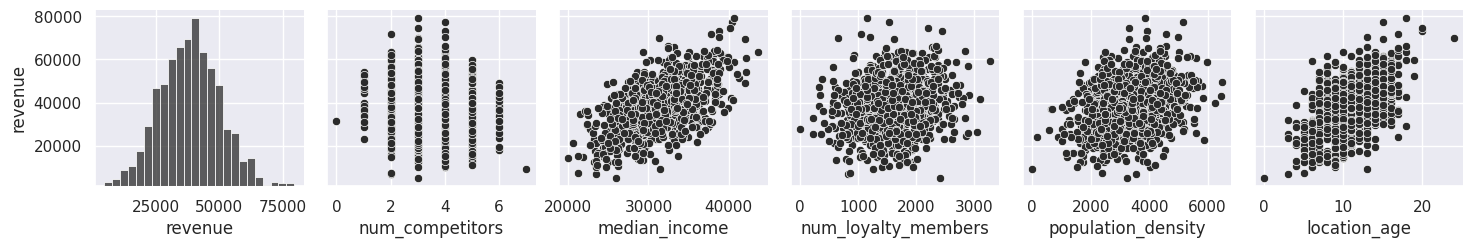

In [86]:
sns.pairplot(df,x_vars=df.columns, y_vars="revenue")
plt.show()

In [87]:
df.corr()

revenue  num_competitors  median_income  \
revenue              1.000000        -0.156685       0.601888   
num_competitors     -0.156685         1.000000      -0.018398   
median_income        0.601888        -0.018398       1.000000   
num_loyalty_members  0.173432        -0.027283       0.011891   
population_density   0.311653         0.035768      -0.041697   
location_age         0.552773         0.053796       0.045621   

                     num_loyalty_members  population_density  location_age  
revenue                         0.173432            0.311653      0.552773  
num_competitors                -0.027283            0.035768      0.053796  
median_income                   0.011891           -0.041697      0.045621  
num_loyalty_members             1.000000           -0.028611      0.036016  
population_density             -0.028611            1.000000     -0.009977  
location_age                    0.036016           -0.009977      1.000000

### The Prediction

In [89]:
df = pd.read_csv(url5)
df.head()

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80              3.0       30527.57               1407.0   
1  38628.37              3.0       30185.49               1025.0   
2  39715.16              1.0       32182.24               1498.0   
3  35593.30              5.0       29728.65               2340.0   
4  35128.18              4.0       30691.17                847.0   

   population_density  location_age  
0              3302.0          12.0  
1              4422.0          11.0  
2              3260.0          12.0  
3              4325.0          10.0  
4              3774.0          11.0

In [90]:
X = df[['num_competitors',\
       'median_income',\
       'num_loyalty_members',\
       'population_density',\
       'location_age']]
y = df['revenue']

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [93]:
#Print out the model coefficients:
model.coef_

array([-2.14765128e+03,  1.71903196e+00,  3.50665069e+00,  4.31777912e+00,
        2.06703103e+03])

In [94]:
model.intercept_

-51068.63644236364

In [95]:
single_location = pd.DataFrame({'num_competitors': [3],\
                                'median_income': [30000],\
                                'num_loyalty_members': [1200],\
                                'population_density': [2000],\
                                'location_age': [10]})

model.predict(single_location)

array([27573.21782447])

<ipython-input-96-a29702601cea>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')


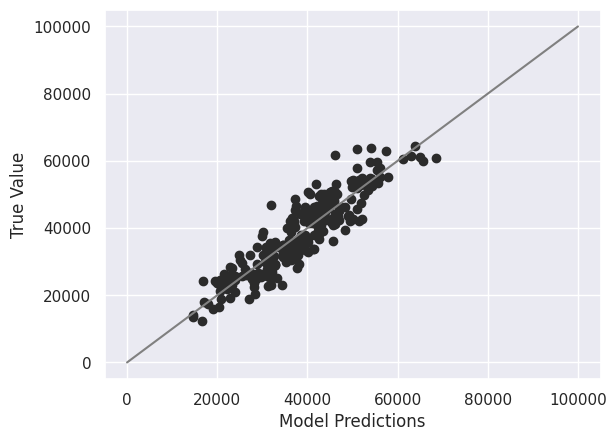

In [96]:
plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.plot([0, 100000], [0, 100000], 'k-', color = 'gray')
plt.show()

In [97]:
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.90615978],
       [0.90615978, 1.        ]])

## Materi 6

### Materi 6.1

In [99]:
url61 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_6/offer_responses.csv"
df = pd.read_csv(url61)
df.head()

responses  offer_discount  offer_quality  offer_reach
0     4151.0            26.0      10.257680      31344.0
1     3397.0            35.0      15.194380      24016.0
2     3274.0            21.0      13.971468      28832.0
3     3426.0            27.0       6.054338      26747.0
4     5745.0            42.0      16.801365      46968.0

In [100]:
X = df[['offer_quality',\
        'offer_discount',\
        'offer_reach']]

y = df['responses']

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 10)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('RMSE with all variables: ' + \
      str(mean_squared_error(predictions, y_test)**0.5))

RMSE with all variables: 966.2461828577946


In [103]:
X_train2 = X_train.drop('offer_quality',axis=1)
X_test2 = X_test.drop('offer_quality',axis=1)

model = LinearRegression()
model.fit(X_train2,y_train)

predictions = model.predict(X_test2)

print('RMSE without offer quality: ' + \
      str(mean_squared_error(predictions, y_test)**0.5))

RMSE without offer quality: 965.5346123758474


In [104]:
X_train3 = X_train.drop('offer_discount',axis=1)
X_test3 = X_test.drop('offer_discount',axis=1)

model = LinearRegression()
model.fit(X_train3,y_train)

predictions = model.predict(X_test3)

print('RMSE without offer discount: ' + \
      str(mean_squared_error(predictions, y_test)**0.5))

RMSE without offer discount: 1231.6766556327284


In [105]:
X_train4 = X_train.drop('offer_reach',axis=1)
X_test4 = X_test.drop('offer_reach',axis=1)

model = LinearRegression()
model.fit(X_train4,y_train)

predictions = model.predict(X_test4)

print('RMSE without offer reach: ' + \
      str(mean_squared_error(predictions, y_test)**0.5))

RMSE without offer reach: 1185.8456831644116


### Materi 6.2

In [106]:
url62 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_6/customer_spend.csv"
df = pd.read_csv(url62)
df.head()

cur_year_spend  prev_year_spend  days_since_last_purchase  \
0         5536.46          1681.26                         7   
1          871.41          1366.74                        12   
2         2046.74          1419.38                        10   
3         4662.70          1561.21                        12   
4         3539.46          1397.60                        17   

   days_since_first_purchase  total_transactions  age    income  \
0                         61                  34   61  97914.93   
1                         34                  33   68  30904.69   
2                         81                  22   54  48194.59   
3                         32                  34   49  93551.98   
4                         72                  34   66  66267.57   

   engagement_score  
0         -0.652392  
1          0.007327  
2          0.221666  
3          1.149641  
4          0.835834

In [107]:
cols = df.columns[1:]
X = df[cols]

y = df['cur_year_spend']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 100)

In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)

In [110]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [111]:
for featureNum in range(X_train.shape[1]):
  # If feature was selected
  if rfe.support_[featureNum] == True:
    # Print feature name and rank
    print("Feature: {}, Rank: {}"\
          .format(X_train.columns[featureNum],\
                  rfe.ranking_[featureNum]))

Feature: days_since_first_purchase, Rank: 1
Feature: total_transactions, Rank: 1
Feature: engagement_score, Rank: 1


In [112]:
X_train_reduced = X_train[X_train.columns[rfe.support_]]
X_test_reduced = X_test[X_train.columns[rfe.support_]]

In [113]:
rfe_model = LinearRegression()
rfe_model.fit(X_train_reduced,y_train)

LinearRegression()

In [114]:
from sklearn.metrics import mean_squared_error

rfe_predictions = rfe_model.predict(X_test_reduced)
print(mean_squared_error(rfe_predictions, y_test)**0.5)

1075.9083016269917


### Materi 6.3

In [116]:
url63 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_6/spend_age_income_ed.csv"
df = pd.read_csv(url63)
df.head()

spend   age   income  years_of_education
0  3304.0  36.0  45125.0                  12
1  3709.0  43.0  41695.0                  10
2  3305.0  47.0  39253.0                  17
3  2170.0  33.0  32384.0                  13
4  2113.0  30.0  33182.0                  10

In [117]:
X = df[['age','income','years_of_education']]
y = df['spend']

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, random_state = 10)

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
from sklearn.tree import DecisionTreeRegressor

max2_tree_model = DecisionTreeRegressor(max_depth=2)
max2_tree_model.fit(X_train,y_train)

max5_tree_model = DecisionTreeRegressor(max_depth=5)
max5_tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [121]:
from sklearn.ensemble import RandomForestRegressor

max2_forest_model = RandomForestRegressor(max_depth=2, \
                                          random_state=10)
max2_forest_model.fit(X_train,y_train)

max5_forest_model = RandomForestRegressor(max_depth=5, \
                                          random_state=10)
max5_forest_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=10)

In [122]:
from sklearn.metrics import mean_squared_error

linear_predictions = model.predict(X_test)
print('Linear model RMSE: ' + \
      str(mean_squared_error(linear_predictions, y_test)**0.5))

max2_tree_predictions = max2_tree_model.predict(X_test)
print('Tree with max depth of 2 RMSE: ' + \
      str(mean_squared_error(max2_tree_predictions, y_test)**0.5))

max5_tree_predictions = max5_tree_model.predict(X_test)
print('Tree with max depth of 5 RMSE: ' + \
      str(mean_squared_error(max5_tree_predictions, y_test)**0.5))

max2_forest_predictions = max2_forest_model.predict(X_test)
print('Random Forest with max depth of 2 RMSE: ' + \
      str(mean_squared_error(max2_forest_predictions, \
                             y_test)**0.5))

max5_forest_predictions = max5_forest_model.predict(X_test)
print('Random Forest with max depth of 5 RMSE: ' + \
      str(mean_squared_error(max5_forest_predictions, \
                             y_test)**0.5))

Linear model RMSE: 348.19771532747865
Tree with max depth of 2 RMSE: 268.51069264082935
Tree with max depth of 5 RMSE: 125.53257106419696
Random Forest with max depth of 2 RMSE: 266.45844988320863
Random Forest with max depth of 5 RMSE: 115.2014058797442


## Materi 7

In [252]:
url71 = 'drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_7_dan_8/Telco_Churn_Data.csv'
data = pd.read_csv(url71)
data.head(5)

Target Churn  Target Code  Current Bill Amt     Avg Calls  \
0     No Churn            0             14210  17950.000000   
1        Churn            1             14407      0.000000   
2        Churn            1             12712    204.666667   
3     No Churn            0             13807  15490.333300   
4     No Churn            0              3805   5075.000000   

   Avg Calls Weekdays  Account Age  Percent Increase MOM Acct Plan Subtype  \
0          30297.0000           24             -0.334193              Gold   
1              0.0000           28              0.000000            Silver   
2          10393.6667           23              0.000000              Gold   
3          41256.3333           39              0.148986            Silver   
4          12333.3333           23             -0.686047              Gold   

    Complaint Code  Avg Days Delinquent  Current TechSupComplaints  \
0  Billing Problem                  6.2                          0   
1           Moving                  1.0                          0   
2  Billing Problem                 17.6                          0   
3  Billing Problem                  0.0                          0   
4  Billing Problem                  3.8                          0   

   Current Days OpenWorkOrders  Equipment Age  Condition of Current Handset  \
0                          0.0              8                           1.0   
1                          0.0             17                           1.0   
2                          0.0             23                           1.0   
3                          0.0             17                           1.0   
4                          0.0             10                           1.0   

   Avg Hours WorkOrderOpenned  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

In [174]:
len(data)

4708

In [175]:
data.shape

(4708, 15)

In [176]:
data.isnull().values.any()

True

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Churn                  4708 non-null   object 
 1   Target Code                   4708 non-null   int64  
 2   Current Bill Amt              4708 non-null   int64  
 3   Avg Calls                     4708 non-null   float64
 4   Avg Calls Weekdays            4708 non-null   float64
 5   Account Age                   4708 non-null   int64  
 6   Percent Increase MOM          4708 non-null   float64
 7   Acct Plan Subtype             4708 non-null   object 
 8   Complaint Code                4701 non-null   object 
 9   Avg Days Delinquent           4708 non-null   float64
 10  Current TechSupComplaints     4708 non-null   int64  
 11  Current Days OpenWorkOrders   4708 non-null   float64
 12  Equipment Age                 4708 non-null   int64  
 13  Con

In [178]:
## Bonus method for renaming the columns
data.columns=data.columns.str.replace(' ','_')

In [179]:
# Fix typo in Avg_Hours_WorkOrderOpenned column
data['Avg_Hours_WorkOrderOpened'] = \
data['Avg_Hours_WorkOrderOpenned']
# Let's drop the older column (with typo)
data.drop(["Avg_Hours_WorkOrderOpenned"],axis=1,inplace=True)

In [180]:
data.columns

Index(['Target_Churn', 'Target_Code', 'Current_Bill_Amt', 'Avg_Calls',
       'Avg_Calls_Weekdays', 'Account_Age', 'Percent_Increase_MOM',
       'Acct_Plan_Subtype', 'Complaint_Code', 'Avg_Days_Delinquent',
       'Current_TechSupComplaints', 'Current_Days_OpenWorkOrders',
       'Equipment_Age', 'Condition_of_Current_Handset',
       'Avg_Hours_WorkOrderOpened'],
      dtype='object')

In [181]:
data.describe()

Target_Code  Current_Bill_Amt      Avg_Calls  Avg_Calls_Weekdays  \
count  4708.000000       4708.000000    4708.000000         4708.000000   
mean      0.485769      19828.815845    9269.690314        38127.994973   
std       0.499851      17204.510108   10437.339850        39172.244943   
min       0.000000       -690.000000       0.000000            0.000000   
25%       0.000000      12288.000000    2602.250002        13031.250025   
50%       0.000000      15254.000000    6396.333330        26765.833350   
75%       1.000000      22799.000000   12250.499975        50061.416675   
max       1.000000     325127.000000  181786.000000       374457.667000   

       Account_Age  Percent_Increase_MOM  Avg_Days_Delinquent  \
count  4708.000000           4708.000000          4708.000000   
mean     26.079652             -0.005127            13.968564   
std       7.149933              4.481852            10.789062   
min      15.000000             -1.000000             0.000000   
25%      20.000000             -0.574084             6.000000   
50%      25.000000             -0.185280            12.400000   
75%      32.000000              0.121823            19.300000   
max      40.000000            210.100000           126.000000   

       Current_TechSupComplaints  Current_Days_OpenWorkOrders  Equipment_Age  \
count                4708.000000                  4708.000000    4708.000000   
mean                    0.414826                     2.438828      10.811810   
std                     0.954549                    20.197292       8.710548   
min                     0.000000                     0.000000       0.000000   
25%                     0.000000                     0.000000       4.000000   
50%                     0.000000                     0.000000       9.000000   
75%                     0.000000                     0.000000      17.000000   
max                    11.000000                   368.000000      39.000000   

       Condition_of_Current_Handset  Avg_Hours_WorkOrderOpened  
count                   4264.000000                4708.000000  
mean                       1.019231                   0.936501  
std                        0.144021                   8.926752  
min                        1.000000                   0.000000  
25%                        1.000000                   0.000000  
50%                        1.000000                   0.000000  
75%                        1.000000                   0.000000  
max                        3.000000                 297.500000

In [182]:
data.describe(include='object')

Target_Churn Acct_Plan_Subtype   Complaint_Code
count          4708              4708             4701
unique            2                 2                6
top        No Churn            Silver  Billing Problem
freq           2421              3914             2908

In [183]:
data['Target_Code']=data.Target_Code.astype('object')
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object')
data['Current_TechSupComplaints']=\
data.Current_TechSupComplaints.astype('object')
data['Target_Code']=data.Target_Code.astype('int64')

In [184]:
data.describe(include='object')

Target_Churn Acct_Plan_Subtype   Complaint_Code  \
count          4708              4708             4701   
unique            2                 2                6   
top        No Churn            Silver  Billing Problem   
freq           2421              3914             2908   

        Current_TechSupComplaints  Condition_of_Current_Handset  
count                        4708                        4264.0  
unique                         11                           3.0  
top                             0                           1.0  
freq                         3589                        4186.0

In [185]:
## Percentage of missing Values present

round(data.isnull().sum()/len(data)*100,2)

Target_Churn                    0.00
Target_Code                     0.00
Current_Bill_Amt                0.00
Avg_Calls                       0.00
Avg_Calls_Weekdays              0.00
Account_Age                     0.00
Percent_Increase_MOM            0.00
Acct_Plan_Subtype               0.00
Complaint_Code                  0.15
Avg_Days_Delinquent             0.00
Current_TechSupComplaints       0.00
Current_Days_OpenWorkOrders     0.00
Equipment_Age                   0.00
Condition_of_Current_Handset    9.43
Avg_Hours_WorkOrderOpened       0.00
dtype: float64

In [186]:
data.Complaint_Code.value_counts()

Billing Problem         2908
Call Quality            1070
Moving                   511
Check Account            195
Inaccurate Sales Inf      13
Pricing                    4
Name: Complaint_Code, dtype: int64

In [187]:
data.Condition_of_Current_Handset.value_counts()

1.0    4186
2.0      74
3.0       4
Name: Condition_of_Current_Handset, dtype: int64

In [188]:
data['Complaint_Code']=data['Complaint_Code']\
                       .fillna(value='Billing Problem')
data['Condition_of_Current_Handset']=\
data['Condition_of_Current_Handset'].fillna(value=1)
data['Condition_of_Current_Handset']=\
data.Condition_of_Current_Handset.astype('object')

In [189]:
data['Target_Churn'].value_counts(0)

No Churn    2421
Churn       2287
Name: Target_Churn, dtype: int64

In [190]:
data['Target_Churn'].value_counts(1)*100

No Churn    51.42311
Churn       48.57689
Name: Target_Churn, dtype: float64

In [191]:
summary_churn = data.groupby('Target_Churn')
summary_churn.mean()

Target_Code  Current_Bill_Amt    Avg_Calls  Avg_Calls_Weekdays  \
Target_Churn                                                                   
Churn                 1.0      20182.709226  9348.878298        37524.030899   
No Churn              0.0      19494.510120  9194.885309        38698.530221   

              Account_Age  Percent_Increase_MOM  Avg_Days_Delinquent  \
Target_Churn                                                           
Churn           25.418452             -0.281309            19.075339   
No Churn        26.704254              0.255769             9.144444   

              Current_Days_OpenWorkOrders  Equipment_Age  \
Target_Churn                                               
Churn                            2.498907      11.191517   
No Churn                         2.382074      10.453119   

              Avg_Hours_WorkOrderOpened  
Target_Churn                             
Churn                          0.960482  
No Churn                       0.913846

In [192]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, \
            xticklabels=corr.columns.values, \
            yticklabels=corr.columns.values,annot=True,cmap='Greys_r')
corr

Target_Code  Current_Bill_Amt  Avg_Calls  \
Target_Code                     1.000000          0.019995   0.007375   
Current_Bill_Amt                0.019995          1.000000   0.352535   
Avg_Calls                       0.007375          0.352535   1.000000   
Avg_Calls_Weekdays             -0.014987          0.428040   0.727226   
Account_Age                    -0.089890          0.003292  -0.023758   
Percent_Increase_MOM           -0.059899         -0.015588  -0.040899   
Avg_Days_Delinquent             0.460092          0.024285   0.019407   
Current_Days_OpenWorkOrders     0.002891          0.076418   0.078428   
Equipment_Age                   0.042373         -0.040732  -0.099348   
Avg_Hours_WorkOrderOpened       0.002611          0.016852   0.013441   

                             Avg_Calls_Weekdays  Account_Age  \
Target_Code                           -0.014987    -0.089890   
Current_Bill_Amt                       0.428040     0.003292   
Avg_Calls                              0.727226    -0.023758   
Avg_Calls_Weekdays                     1.000000     0.029957   
Account_Age                            0.029957     1.000000   
Percent_Increase_MOM                  -0.044496    -0.004022   
Avg_Days_Delinquent                    0.017134    -0.047542   
Current_Days_OpenWorkOrders            0.065318    -0.026270   
Equipment_Age                         -0.103769     0.073503   
Avg_Hours_WorkOrderOpened              0.013577     0.005059   

                             Percent_Increase_MOM  Avg_Days_Delinquent  \
Target_Code                             -0.059899             0.460092   
Current_Bill_Amt                        -0.015588             0.024285   
Avg_Calls                               -0.040899             0.019407   
Avg_Calls_Weekdays                      -0.044496             0.017134   
Account_Age                             -0.004022            -0.047542   
Percent_Increase_MOM                     1.000000             0.049768   
Avg_Days_Delinquent                      0.049768             1.000000   
Current_Days_OpenWorkOrders             -0.003013            -0.001686   
Equipment_Age                           -0.003819             0.014047   
Avg_Hours_WorkOrderOpened               -0.008848             0.000168   

                             Current_Days_OpenWorkOrders  Equipment_Age  \
Target_Code                                     0.002891       0.042373   
Current_Bill_Amt                                0.076418      -0.040732   
Avg_Calls                                       0.078428      -0.099348   
Avg_Calls_Weekdays                              0.065318      -0.103769   
Account_Age                                    -0.026270       0.073503   
Percent_Increase_MOM                           -0.003013      -0.003819   
Avg_Days_Delinquent                            -0.001686       0.014047   
Current_Days_OpenWorkOrders                     1.000000      -0.037599   
Equipment_Age                                  -0.037599       1.000000   
Avg_Hours_WorkOrderOpened                       0.029384      -0.014347   

                             Avg_Hours_WorkOrderOpened  
Target_Code                                   0.002611  
Current_Bill_Amt                              0.016852  
Avg_Calls                                     0.013441  
Avg_Calls_Weekdays                            0.013577  
Account_Age                                   0.005059  
Percent_Increase_MOM                         -0.008848  
Avg_Days_Delinquent                           0.000168  
Current_Days_OpenWorkOrders                   0.029384  
Equipment_Age                                -0.014347  
Avg_Hours_WorkOrderOpened                     1.000000

### Univariate Analysis

In [193]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.Avg_Calls_Weekdays, kde=True, \
             color="gray", \
             ax=axes[0]).set_title('Avg_Calls_Weekdays')
axes[0].set_ylabel('No of Customers')
sns.distplot(data.Avg_Calls, kde=True, color="gray", \
             ax=axes[1]).set_title('Avg_Calls')
axes[1].set_ylabel('No of Customers')
sns.distplot(data.Current_Bill_Amt, kde=True, color="gray", \
             ax=axes[2]).set_title('Current_Bill_Amt')
axes[2].set_ylabel('No of Customers')

Text(0, 0.5, 'No of Customers')

### Bivariate Analysis

Text(0.5, 1.0, 'Customer Complaint Code Distribution')

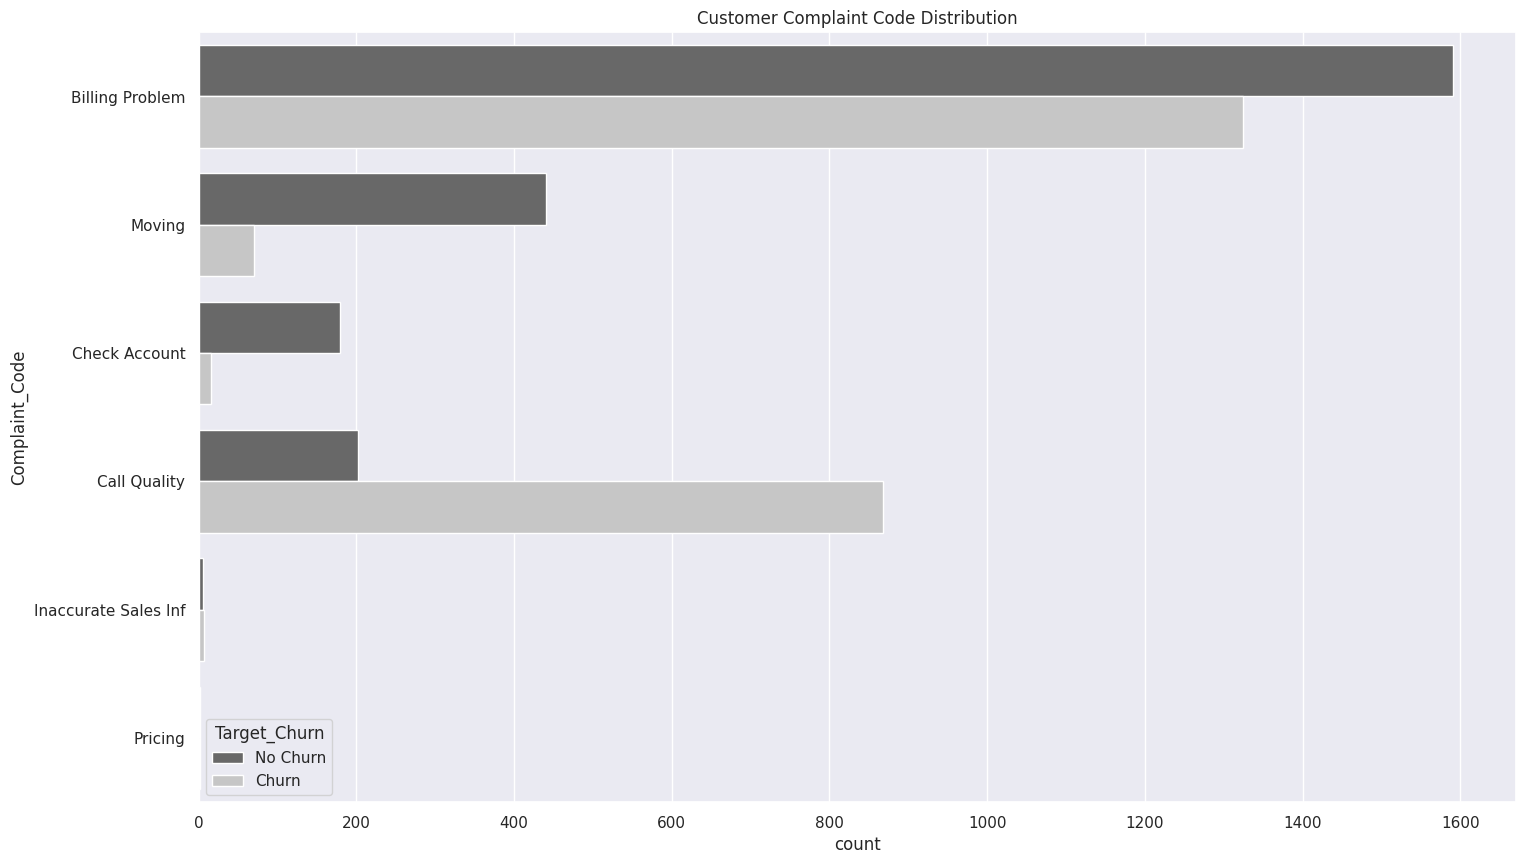

In [194]:
plt.figure(figsize=(17,10))
p=sns.countplot(y="Complaint_Code", hue='Target_Churn', \
                data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Complaint Code Distribution')

Text(0.5, 1.0, 'Customer Acct_Plan_Subtype Distribution')

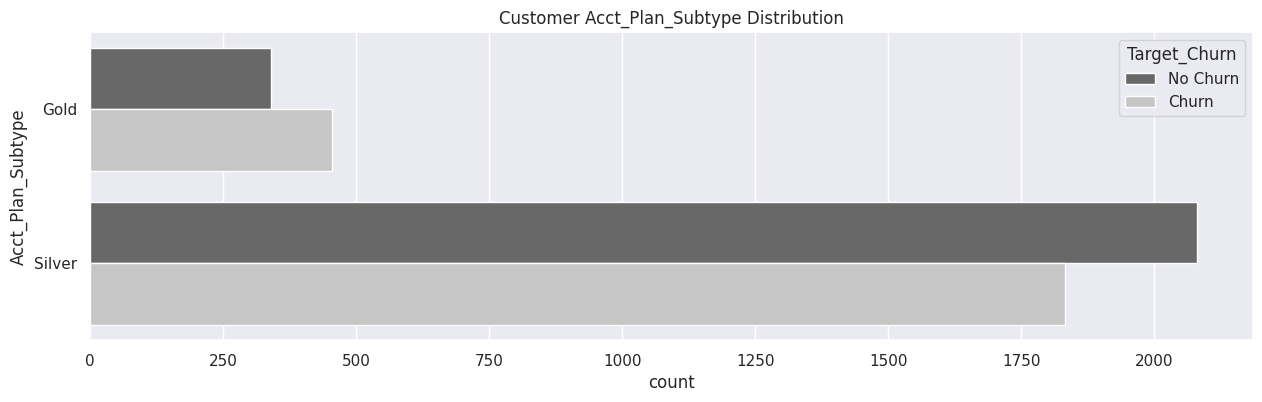

In [195]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Acct_Plan_Subtype", hue='Target_Churn', \
                data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Acct_Plan_Subtype Distribution')

Text(0.5, 1.0, 'Customer Current_TechSupComplaints Distribution')

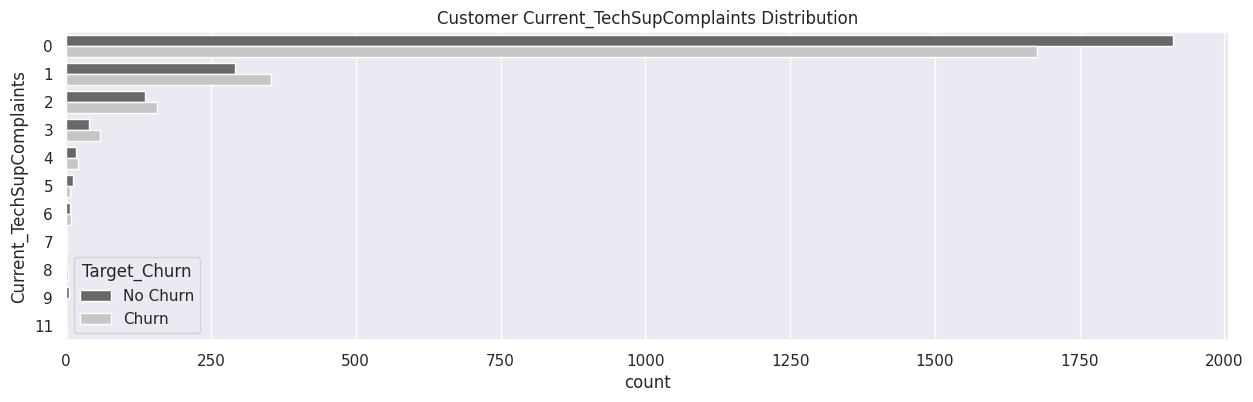

In [196]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Current_TechSupComplaints", hue='Target_Churn', \
                data=data,palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Current_TechSupComplaints Distribution')

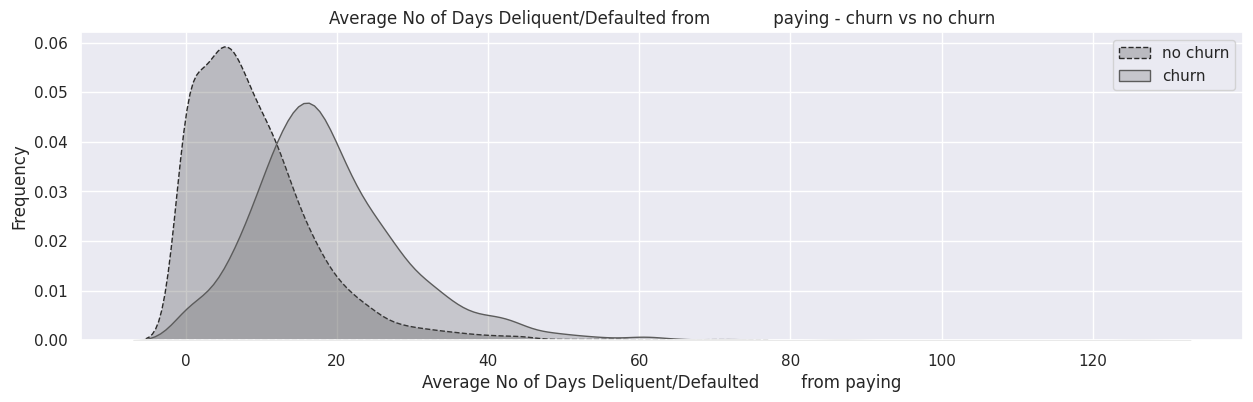

In [197]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
                        'Avg_Days_Delinquent'] , \
               color=sns.color_palette("Greys_r")[0],\
               shade=True,label='no churn',\
               linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1),\
                        'Avg_Days_Delinquent'] , \
               color=sns.color_palette("Greys_r")[1],\
               shade=True, label='churn')
ax.set(xlabel='Average No of Days Deliquent/Defaulted \
       from paying', ylabel='Frequency')
plt.title('Average No of Days Deliquent/Defaulted from \
           paying - churn vs no churn')
plt.legend()

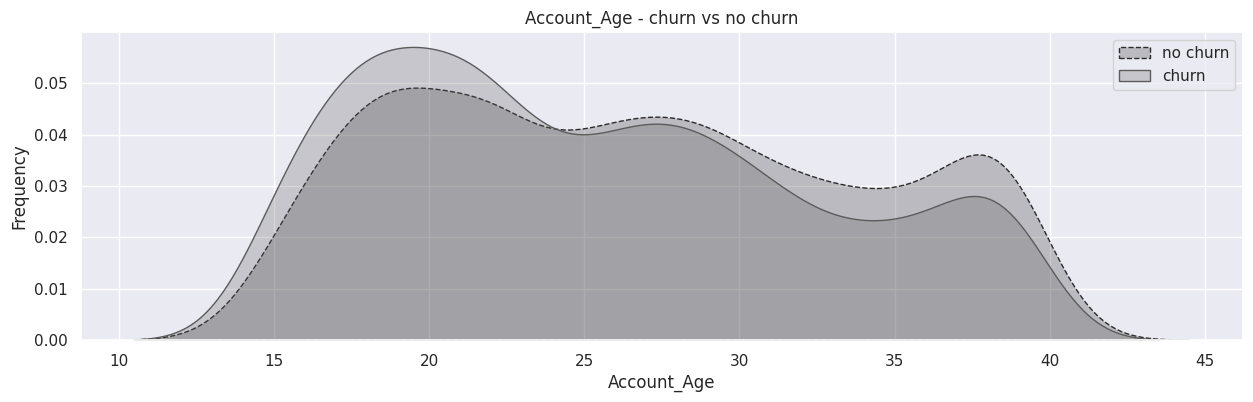

In [198]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
                        'Account_Age'], \
               color=sns.color_palette("Greys_r")[0], \
               shade=True,label='no churn',\
               linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
                        'Account_Age'], \
               color=sns.color_palette("Greys_r")[1] ,\
               shade=True, label='churn')
ax.set(xlabel='Account_Age', ylabel='Frequency')
plt.title('Account_Age - churn vs no churn')
plt.legend()

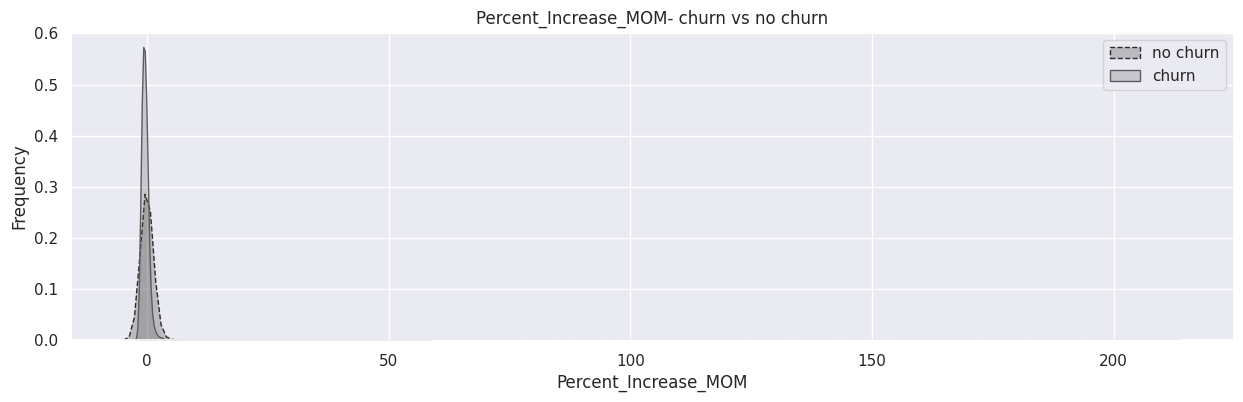

In [199]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 0), \
                        'Percent_Increase_MOM'], \
               color=sns.color_palette("Greys_r")[0], \
               shade=True, label='no churn',\
               linestyle='--')
ax=sns.kdeplot(data.loc[(data['Target_Code'] == 1), \
                        'Percent_Increase_MOM'], \
               color=sns.color_palette("Greys_r")[1], \
               shade=True, label='churn')
ax.set(xlabel='Percent_Increase_MOM', ylabel='Frequency')
plt.title('Percent_Increase_MOM- churn vs no churn')
plt.legend()

### Feature Selection

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [201]:
data["Acct_Plan_Subtype"] = data["Acct_Plan_Subtype"]\
                            .astype('category').cat.codes
data["Complaint_Code"] = data["Complaint_Code"]\
                         .astype('category').cat.codes


In [202]:
data[["Acct_Plan_Subtype","Complaint_Code"]].head()

Acct_Plan_Subtype  Complaint_Code
0                  0               0
1                  1               4
2                  0               0
3                  1               0
4                  0               0

In [203]:
target = 'Target_Code'
X = data.drop(['Target_Code','Target_Churn'], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, test_size=0.15, \
                                    random_state=123, stratify=y)

In [204]:
target = 'Target_Code'
X = data.drop(['Target_Code','Target_Churn'], axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split\
                                   (X, y, test_size=0.15, \
                                    random_state=123, stratify=y)

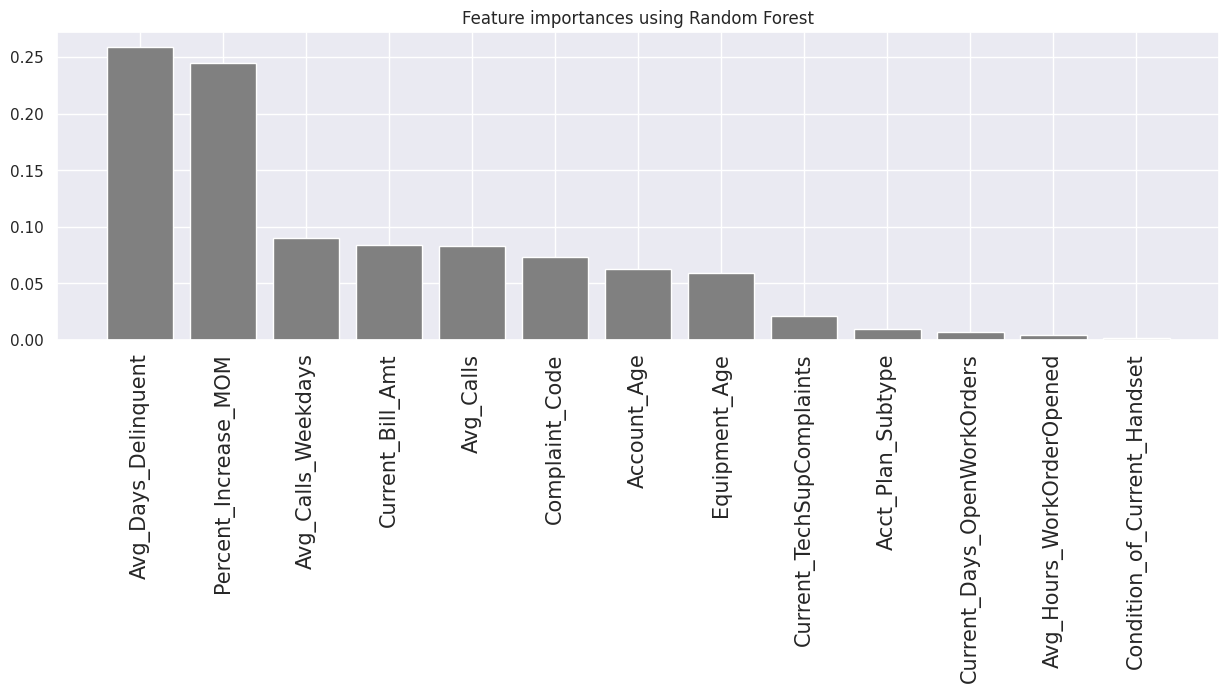

In [205]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Target_Code','Target_Churn'],axis=1)\
               .columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],\
        color="gray", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], \
           rotation='vertical', fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Logistic Regression

In [206]:
import statsmodels.api as sm
top7_features = ['Avg_Days_Delinquent','Percent_Increase_MOM',\
                 'Avg_Calls_Weekdays','Current_Bill_Amt',\
                 'Avg_Calls','Complaint_Code','Account_Age']
logReg = sm.Logit(y_train, X_train[top7_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.551146
         Iterations 8


In [207]:
logistic_regression.summary
logistic_regression.params

Avg_Days_Delinquent     1.109226e-01
Percent_Increase_MOM   -3.922044e-01
Avg_Calls_Weekdays     -3.315366e-06
Current_Bill_Amt       -2.385475e-07
Avg_Calls              -1.817086e-06
Complaint_Code         -2.083688e-01
Account_Age            -4.794911e-02
dtype: float64

In [208]:
coef = logistic_regression.params

def y (coef, Avg_Days_Delinquent, Percent_Increase_MOM, \
       Avg_Calls_Weekdays, Current_Bill_Amt, Avg_Calls, \
       Complaint_Code, Account_Age): return coef[0]\
                                     *Avg_Days_Delinquent\
                                     +coef[1]\
                                     *Percent_Increase_MOM\
                                     +coef[2]\
                                     *Avg_Calls_Weekdays\
                                     +coef[3]\
                                     *Current_Bill_Amt\
                                     +coef[4]\
                                     *Avg_Calls\
                                     +coef[5]\
                                     *Complaint_Code\
                                     +coef[6]\
                                     *Account_Age

In [209]:
import numpy as np

# An Employee with
# Avg_Days_Delinquent    40
# Percent_Increase_MOM   5
# Avg_Calls_Weekdays     39000
# Current_Bill_Amt       12000
# Avg_Calls              9000
# Complaint_Code         0
# Account_Age            17
# has 81 % chance of churn

y1 = y(coef, 40, 5, 39000,12000,9000,0,17)
p = np.exp(y1) / (1+np.exp(y1))
p

0.8193916658925811

## Materi 8

### Materi 8.1 - Lanjutan Materi 7 - Menggunakan Scikit-learn

#### Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
clf_logistic = LogisticRegression(random_state=0,solver='lbfgs')\
               .fit(X_train[top7_features], y_train)

In [212]:
clf_logistic

LogisticRegression(random_state=0)

In [213]:
clf_logistic.score(X_test[top7_features], y_test)

0.7454031117397454

#### SVM

In [214]:
from sklearn import svm

In [215]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1))\
          .fit(X_train[top7_features])
X_train_svm = scaling.transform(X_train[top7_features])
X_test_svm = scaling.transform(X_test[top7_features])

In [216]:
clf_svm=svm.SVC(kernel='linear', C=1)

In [217]:
clf_svm.fit(X_train_svm,y_train)

SVC(C=1, kernel='linear')

In [218]:
clf_svm.score(X_test_svm, y_test)

0.7637906647807637

#### Decision Tree

In [219]:
from sklearn import tree

In [220]:
clf_decision = tree.DecisionTreeClassifier()

In [221]:
clf_decision.fit(X_train[top7_features],y_train)

DecisionTreeClassifier()

In [222]:
clf_decision.score(X_test[top7_features], y_test)

0.7708628005657708

#### Random Forest

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
clf_random = RandomForestClassifier(n_estimators=20, \
                                    max_depth=None, \
                                    min_samples_split=7, \
                                    random_state=0)

In [225]:
clf_random.fit(X_train[top7_features], y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [226]:
clf_random.score(X_test[top7_features], y_test)

0.8104667609618105

### Standardization

In [227]:
# Avg_Days_Delinquent
# Percent_Increase_MOM
# Avg_Calls_Weekdays
# Current_Bill_Amt
# Avg_Calls
# Complaint_Code
# Account_Age

In [228]:
from sklearn import preprocessing

In [229]:
## Features to transform
top5_features=['Avg_Calls_Weekdays', 'Current_Bill_Amt', \
               'Avg_Calls', 'Account_Age','Avg_Days_Delinquent']

In [230]:
## Features Left
top2_features=['Percent_Increase_MOM','Complaint_Code']

In [231]:
scaler = preprocessing.StandardScaler()\
.fit(X_train[top5_features])
X_train_scalar=pd.DataFrame\
(scaler.transform(X_train[top5_features]),\
 columns = X_train[top5_features].columns)
X_test_scalar=pd.DataFrame\
(scaler.transform(X_test[top5_features]),\
 columns = X_test[top5_features].columns)

In [232]:
X_train_scalar_combined=pd.concat([X_train_scalar, \
                                   X_train[top2_features]\
                                   .reset_index(drop=True)], \
                                  axis=1, sort=False)

In [233]:
X_test_scalar_combined=pd.concat([X_test_scalar, \
                                  X_test[top2_features]\
                                  .reset_index(drop=True)], \
                                 axis=1, sort=False)

In [234]:
clf_random.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [235]:
clf_random.score(X_test_scalar_combined, y_test)

0.8118811881188119

### Grid Search

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [237]:
parameters = [ {'min_samples_split': [9,10], \
                'n_estimators':[100,150,160],\
                'max_depth': [5,7]}]

In [238]:
clf_random_grid = GridSearchCV(RandomForestClassifier(), \
                               parameters, cv = StratifiedKFold\
                               (n_splits = 3))
clf_random_grid.fit(X_train_scalar_combined, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 7], 'min_samples_split': [9, 10],
                          'n_estimators': [100, 150, 160]}])

In [239]:
print('best score train:', clf_random_grid.best_score_)
print('best parameters train: ', clf_random_grid.best_params_)

best score train: 0.8000478380464681
best parameters train:  {'max_depth': 7, 'min_samples_split': 9, 'n_estimators': 100}


In [240]:
clf_random_grid.score(X_test_scalar_combined, y_test)

0.8246110325318247

In [241]:
## Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameters = [ {'min_samples_split': [9,10], \
                'n_estimators':[100,150,160],\
                'max_depth': [5,7]}]

clf_random_grid = GridSearchCV(RandomForestClassifier(), \
                               parameters, cv = StratifiedKFold\
                               (n_splits = 3))
clf_random_grid.fit(X_train_scalar_combined, y_train)

print('best score train:', clf_random_grid.best_score_)
print('best parameters train: ', clf_random_grid.best_params_)

clf_random_grid.score(X_test_scalar_combined, y_test)

best score train: 0.7995482753746908
best parameters train:  {'max_depth': 7, 'min_samples_split': 9, 'n_estimators': 150}


0.8246110325318247

### Performance Metrics

In [242]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [243]:
clf_random_grid = RandomForestClassifier(n_estimators=100, \
                                         max_depth=7,\
                                         min_samples_split=10, \
                                         random_state=0)

In [244]:
clf_random_grid.fit(X_train_scalar_combined, y_train)

RandomForestClassifier(max_depth=7, min_samples_split=10, random_state=0)

In [245]:
y_pred=clf_random_grid.predict(X_test_scalar_combined)

In [246]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.85      0.80      0.82       364
       Churn       0.80      0.85      0.82       343

    accuracy                           0.82       707
   macro avg       0.82      0.82      0.82       707
weighted avg       0.82      0.82      0.82       707



In [247]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'],
                     columns = ['No Churn','Churn'])

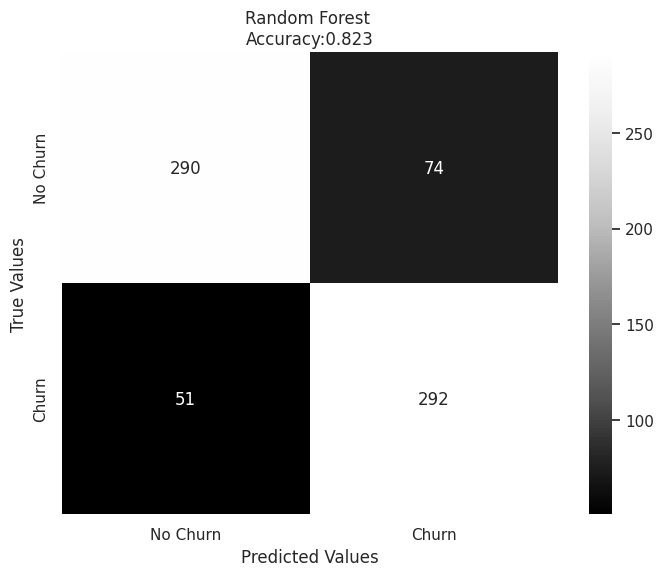

In [248]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['No Churn','Churn'],
                     columns = ['No Churn','Churn'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [249]:
from sklearn.metrics import roc_curve,auc

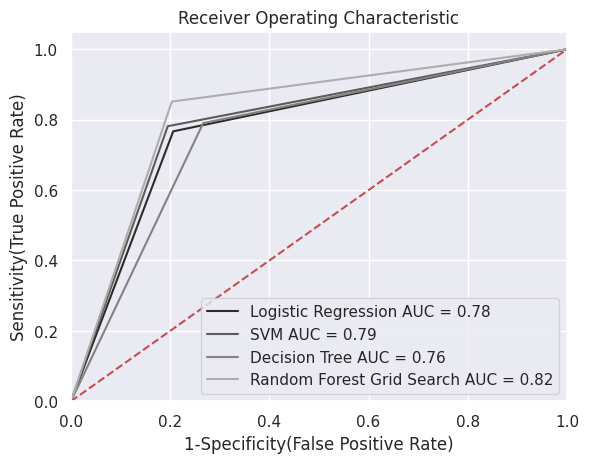

In [250]:
models = [
{
    'label': 'Logistic Regression',
    'model': clf_logistic,
},
{
    'label': 'SVM',
    'model': clf_svm,
},
{
    'label': 'Decision Tree',
    'model': clf_decision,
},
{
    'label': 'Random Forest Grid Search',
    'model': clf_random_grid,
}
]

for m in models:
    model = m['model']
    model.fit(X_train_scalar_combined, y_train)
    y_pred=model.predict(X_test_scalar_combined)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' \
             % (m['label'], roc_auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Materi 9

### Materi 9.1

In [251]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,\
                            confusion_matrix,\
                            accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

In [253]:
url9 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_9/MarketingData.csv"
data= pd.read_csv(url9)
data.head(5)

Fresh         Milk      Grocery       Frozen  Detergents_Paper  \
0  6623.613537  5513.093240  6019.057354  5669.568008       5898.660607   
1  5642.542497  5829.866565  3960.339943  4270.020548       3498.818262   
2  5292.078175  6634.370556  4444.335138  4888.286021       3265.391352   
3  5595.227928  4754.860698  2977.856511  3462.490957       3609.264559   
4  5126.693267  6009.649079  3811.569943  4744.115976       3829.516831   

    Delicassen  Channel  
0  5179.234947        2  
1  4327.423268        2  
2  4887.560190        2  
3  4268.641413        0  
4  5097.491872        2

In [254]:
data.shape

(20000, 7)

In [255]:
data.isnull().values.any()

False

In [257]:
data.describe()

Fresh          Milk       Grocery        Frozen  \
count  20000.000000  20000.000000  20000.000000  20000.000000   
mean    5853.350191   5267.873868   4873.362341   4899.477763   
std     1128.370297   1177.563192   1265.579790   1220.923393   
min        1.000000      1.000000      1.000000      1.000000   
25%     5155.249455   4438.167387   3983.317183   4071.997222   
50%     5988.720207   5337.741327   4828.100401   5048.099489   
75%     6573.895741   6081.755179   5784.992859   5684.876863   
max    10000.000000  10000.000000  10000.000000  10000.000000   

       Detergents_Paper    Delicassen       Channel  
count      20000.000000  20000.000000  20000.000000  
mean        4786.331781   5613.672184      1.499350  
std         1154.682284   1343.743103      1.118464  
min            1.000000      1.000000      0.000000  
25%         3877.943500   4705.582182      0.000000  
50%         4857.070488   5425.888761      1.000000  
75%         5602.146034   6574.281056      3.000000  
max        10000.000000  10000.000000      3.000000

In [258]:
data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

In [259]:
target = 'Channel'
X = data.drop(['Channel'],axis=1)
y=data[target]

In [260]:
X_train, X_test, y_train, y_test = train_test_split\
                (X.values,y,\
                test_size=0.20, \
                random_state=123, \
                stratify=y)

In [261]:
clf_random = RandomForestClassifier(n_estimators=20, \
                    max_depth=None, \
                    min_samples_split=7, \
                    random_state=0)

In [262]:
clf_random.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [263]:
y_pred=clf_random.predict(X_test)

In [264]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8888143115382328, 0.8885103588795973, 0.888619538273321, None)

In [265]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.8885, 0.8885, 0.8885, None)

In [266]:
target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test, y_pred,\
            target_names=target_names))

              precision    recall  f1-score   support

      Retail       0.90      0.90      0.90      1001
    RoadShow       0.86      0.86      0.86      1000
 SocialMedia       0.93      0.91      0.92       998
   Televison       0.87      0.89      0.88      1001

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



In [267]:
cm = confusion_matrix(y_test, y_pred)

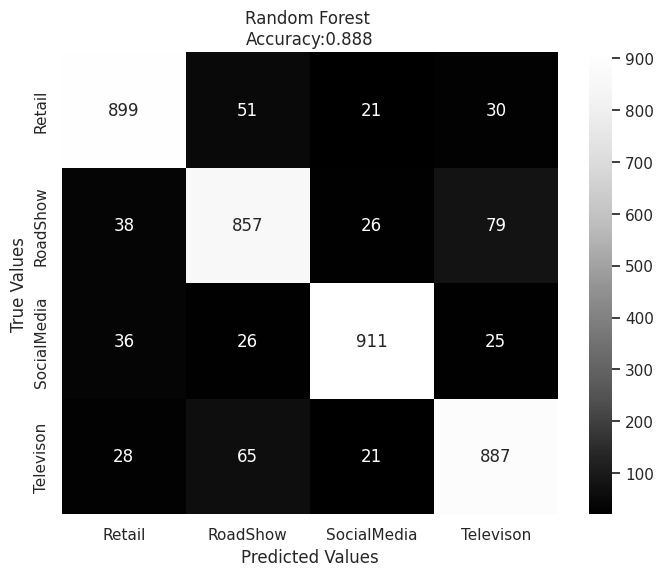

In [268]:
cm_df = pd.DataFrame(cm,\
            index = target_names,\
            columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
    .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

### Materi 9.1

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [269]:
url92 = "drive/MyDrive/Pelatihan_Data_Analitik/Data_Materi_9/bank.csv"
bank = pd.read_csv(url92, sep = ';')
bank.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [271]:
bank = bank.rename(columns={'y': 'Target'})

In [272]:
bank['Target']=bank['Target'].replace({'no': 0, 'yes': 1})

In [273]:
bank.shape

(4334, 17)

In [274]:
bank.isnull().values.any()

False

In [275]:
bank.describe()

age       balance          day     duration     campaign  \
count  4334.000000   4334.000000  4334.000000  4334.000000  4334.000000   
mean     40.991924   1410.637517    15.913936   264.544301     2.806876   
std      10.505378   3010.612091     8.216673   260.642141     3.129682   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     67.000000     9.000000   104.000000     1.000000   
50%      39.000000    440.000000    16.000000   186.000000     2.000000   
75%      48.000000   1464.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous       Target  
count  4334.000000  4334.000000  4334.000000  
mean     39.670974     0.544070     0.115828  
std      99.934062     1.702219     0.320056  
min      -1.000000     0.000000     0.000000  
25%      -1.000000     0.000000     0.000000  
50%      -1.000000     0.000000     0.000000  
75%      -1.000000     0.000000     0.000000  
max     871.000000    25.000000     1.000000

In [276]:
bank.describe(include=['O'])

job  marital  education default housing  loan   contact month  \
count         4334     4334       4334    4334    4334  4334      4334  4334   
unique          12        3          3       2       2     2         3    12   
top     management  married  secondary      no     yes    no  cellular   may   
freq           942     2680       2306    4261    2476  3650      2801  1339   

       poutcome  
count      4334  
unique        4  
top     unknown  
freq       3555

In [277]:
bank['Target'].value_counts(0)

0    3832
1     502
Name: Target, dtype: int64

In [278]:
bank["job"] = bank["job"].astype('category').cat.codes
bank["marital"] = bank["marital"].astype('category').cat.codes
bank["default"] = bank["job"].astype('category').cat.codes
bank["housing"] = bank["marital"].astype('category').cat.codes
bank["loan"] = bank["loan"].astype('category').cat.codes
bank["contact"] = bank["contact"].astype('category').cat.codes
bank["poutcome"] = bank["poutcome"].astype('category').cat.codes

In [279]:
bank['education'] = bank['education'].replace({'primary': 0, 'secondary': 1,\
            'tertiary':2})

In [280]:
bank['month'].replace(['jan', 'feb', 'mar','apr','may','jun',\
            'jul','aug','sep','oct','nov','dec'],\
            [1,2,3,4,5,6,7,8,9,10,11,12],\
            inplace=True)

In [281]:
bank.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0       10     1787        1     0        0   
1   33    7        1          1        7     4789        1     1        0   
2   35    4        2          2        4     1350        2     0        0   
3   30    4        1          2        4     1476        1     1        2   
4   59    1        1          1        1        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  
0   19     10        79         1     -1         0         3       0  
1   11      5       220         1    339         4         0       0  
2   16      4       185         1    330         1         0       0  
3    3      6       199         4     -1         0         3       0  
4    5      5       226         1     -1         0         3       0

In [282]:
target = 'Target'
X = bank.drop(['Target'], axis=1)
y=bank[target]

X_train, X_test, y_train, y_test = train_test_split\
                (X,y,test_size=0.15,\
                 random_state=123,\
                 stratify=y)

In [283]:
y_train.value_counts()

0    3256
1     427
Name: Target, dtype: int64

In [284]:
y_test.value_counts()

0    576
1     75
Name: Target, dtype: int64

In [285]:
standard_scalar = StandardScaler()
X_train_sc = standard_scalar.fit_transform(X_train)
X_test_sc = standard_scalar.transform(X_test)

In [286]:
clf_random = RandomForestClassifier(n_estimators=20,\
                max_depth=None,\
                min_samples_split=7,\
                random_state=0)

In [287]:
clf_random.fit(X_train_sc,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [288]:
y_pred=clf_random.predict(X_test_sc)

In [289]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred,\
                target_names=target_names))

              precision    recall  f1-score   support

          No       0.92      0.98      0.95       576
         Yes       0.67      0.32      0.43        75

    accuracy                           0.90       651
   macro avg       0.79      0.65      0.69       651
weighted avg       0.89      0.90      0.89       651



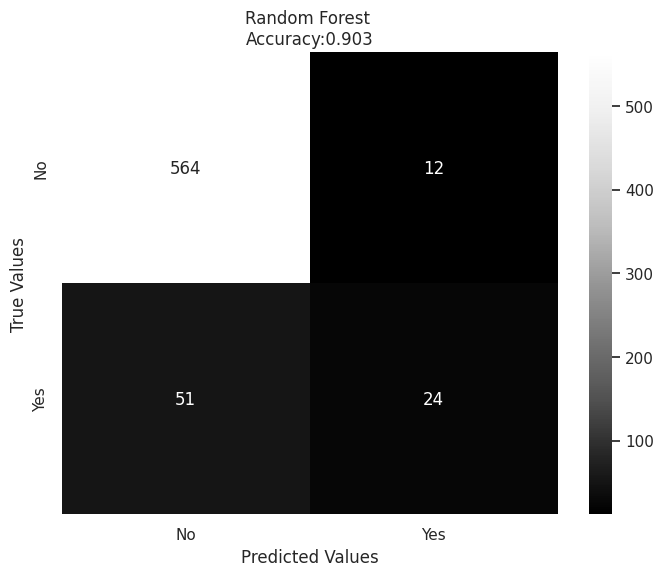

In [290]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,\
            index = ['No', 'Yes'],\
            columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
    .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [291]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [292]:
standard_scalar = StandardScaler()
X_train_sc_resampled = standard_scalar.fit_transform(X_resampled)
X_test_sc = standard_scalar.transform(X_test)

In [293]:
clf_random.fit(X_train_sc_resampled,y_resampled)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [294]:
y_pred=clf_random.predict(X_test_sc)

In [295]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred,\
            target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.91      0.93       576
         Yes       0.48      0.61      0.54        75

    accuracy                           0.88       651
   macro avg       0.72      0.76      0.74       651
weighted avg       0.89      0.88      0.89       651



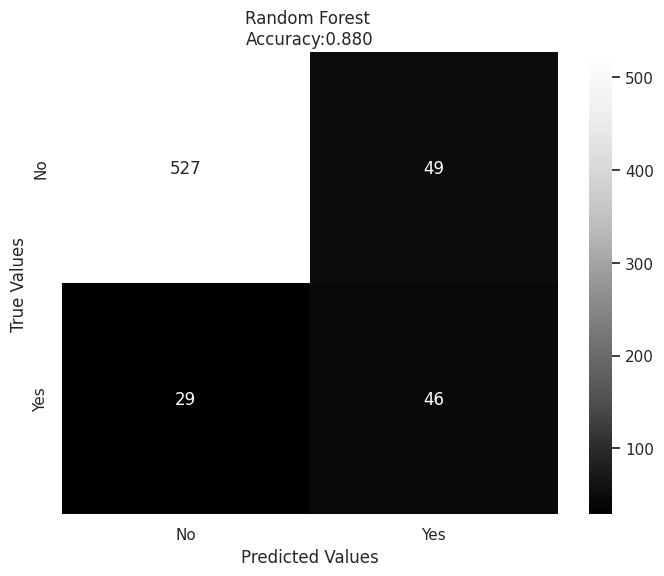

In [296]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,\
            index = ['No', 'Yes'],\
            columns = ['No', 'Yes'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
    .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()